#### Importing the libraries:

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [125]:
sns.set()
sns.set_palette(palette = 'deep')
import folium
from folium.plugins import FastMarkerCluster

#### Read the data:

In [247]:
df = pd.read_csv('listings_summary.csv')
df.head()

id     scrape_id  last_scraped experiences_offered  host_id host_name  \
0  2015  2.018110e+13         43411                none     2217       Ian   
1  2695  2.018110e+13         43411                none     2986   Michael   
2  3176  2.018110e+13         43411                none     3718    Britta   
3  3309  2.018110e+13         43411                none     4108      Jana   
4  7071  2.018110e+13         43411                none    17391    Bright   

   host_since                         host_location host_response_time  \
0  18-08-2008  Key Biscayne, Florida, United States     within an hour   
1  16-09-2008               Berlin, Berlin, Germany                NaN   
2  19-10-2008  Coledale, New South Wales, Australia       within a day   
3  07-11-2008               Berlin, Berlin, Germany                NaN   
4  16-05-2009               Berlin, Berlin, Germany     within an hour   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                0.96                   NaN                 t   
1                 NaN                   NaN                 f   
2                1.00                   NaN                 f   
3                 NaN                   NaN                 f   
4                1.00                   NaN                 t   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0              Mitte                  4.0                        4.0   
1    Prenzlauer Berg                  1.0                        1.0   
2    Prenzlauer Berg                  1.0                        1.0   
3         Schöneberg                  1.0                        1.0   
4    Prenzlauer Berg                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
2  ['email', 'phone', 'facebook', 'reviews', 'man...                    t   
3  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                   street    neighbourhood  \
0                      t  Berlin, Berlin, Germany            Mitte   
1                      t  Berlin, Berlin, Germany              NaN   
2                      t  Berlin, Berlin, Germany  Prenzlauer Berg   
3                      t  Berlin, Berlin, Germany       Schöneberg   
4                      t  Berlin, Berlin, Germany  Prenzlauer Berg   

     neighbourhood_cleansed neighbourhood_group_cleansed    city   state  \
0           Brunnenstr. Süd                        Mitte  Berlin  Berlin   
1  Prenzlauer Berg Nordwest                       Pankow  Berlin  Berlin   
2   Prenzlauer Berg Südwest                       Pankow  Berlin  Berlin   
3           Schöneberg-Nord       Tempelhof - Schöneberg  Berlin  Berlin   
4            Helmholtzplatz                       Pankow  Berlin  Berlin   

  zipcode  market   smart_location country_code  country   latitude  \
0   10119  Berlin  Berlin, Germany           DE  Germany  52.534537   
1   10437  Berlin  Berlin, Germany           DE  Germany  52.548513   
2   10405  Berlin  Berlin, Germany           DE  Germany  52.534996   
3   10777  Berlin  Berlin, Germany           DE  Germany  52.498855   
4   10437  Berlin  Berlin, Germany           DE  Germany  52.543157   

   longitude is_location_exact property_type        room_type  accommodates  \
0  13.402557                 f    Guesthouse  Entire home/apt             3   
1  13.404553                 t     Apartment     Private room             2   
2  13.417579                 t     Apartment  Entire home/apt             4   
3  13.349065                 t     Apartment     Private room             2   
4  13.415091                 t     Apartment     Private room             2   

   bathrooms  bedrooms  

In [248]:
pd.options.display.max_columns = None

In [249]:
df.head()

id     scrape_id  last_scraped experiences_offered  host_id host_name  \
0  2015  2.018110e+13         43411                none     2217       Ian   
1  2695  2.018110e+13         43411                none     2986   Michael   
2  3176  2.018110e+13         43411                none     3718    Britta   
3  3309  2.018110e+13         43411                none     4108      Jana   
4  7071  2.018110e+13         43411                none    17391    Bright   

   host_since                         host_location host_response_time  \
0  18-08-2008  Key Biscayne, Florida, United States     within an hour   
1  16-09-2008               Berlin, Berlin, Germany                NaN   
2  19-10-2008  Coledale, New South Wales, Australia       within a day   
3  07-11-2008               Berlin, Berlin, Germany                NaN   
4  16-05-2009               Berlin, Berlin, Germany     within an hour   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                0.96                   NaN                 t   
1                 NaN                   NaN                 f   
2                1.00                   NaN                 f   
3                 NaN                   NaN                 f   
4                1.00                   NaN                 t   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0              Mitte                  4.0                        4.0   
1    Prenzlauer Berg                  1.0                        1.0   
2    Prenzlauer Berg                  1.0                        1.0   
3         Schöneberg                  1.0                        1.0   
4    Prenzlauer Berg                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
2  ['email', 'phone', 'facebook', 'reviews', 'man...                    t   
3  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                   street    neighbourhood  \
0                      t  Berlin, Berlin, Germany            Mitte   
1                      t  Berlin, Berlin, Germany              NaN   
2                      t  Berlin, Berlin, Germany  Prenzlauer Berg   
3                      t  Berlin, Berlin, Germany       Schöneberg   
4                      t  Berlin, Berlin, Germany  Prenzlauer Berg   

     neighbourhood_cleansed neighbourhood_group_cleansed    city   state  \
0           Brunnenstr. Süd                        Mitte  Berlin  Berlin   
1  Prenzlauer Berg Nordwest                       Pankow  Berlin  Berlin   
2   Prenzlauer Berg Südwest                       Pankow  Berlin  Berlin   
3           Schöneberg-Nord       Tempelhof - Schöneberg  Berlin  Berlin   
4            Helmholtzplatz                       Pankow  Berlin  Berlin   

  zipcode  market   smart_location country_code  country   latitude  \
0   10119  Berlin  Berlin, Germany           DE  Germany  52.534537   
1   10437  Berlin  Berlin, Germany           DE  Germany  52.548513   
2   10405  Berlin  Berlin, Germany           DE  Germany  52.534996   
3   10777  Berlin  Berlin, Germany           DE  Germany  52.498855   
4   10437  Berlin  Berlin, Germany           DE  Germany  52.543157   

   longitude is_location_exact property_type        room_type  accommodates  \
0  13.402557                 f    Guesthouse  Entire home/apt             3   
1  13.404553                 t     Apartment     Private room             2   
2  13.417579                 t     Apartment  Entire home/apt             4   
3  13.349065                 t     Apartment     Private room             2   
4  13.415091                 t     Apartment     Private room             2   

   bathrooms  bedrooms  

In [250]:
df.shape

(22552, 76)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [252]:
df.describe()

id     scrape_id  last_scraped       host_id  \
count  2.255200e+04  2.255200e+04  22552.000000  2.255200e+04   
mean   1.571560e+07  2.018110e+13  43411.000266  5.403355e+07   
std    8.552069e+06  0.000000e+00      0.023066  5.816290e+07   
min    2.015000e+03  2.018110e+13  43411.000000  2.217000e+03   
25%    8.065954e+06  2.018110e+13  43411.000000  9.240002e+06   
50%    1.686638e+07  2.018110e+13  43411.000000  3.126711e+07   
75%    2.258393e+07  2.018110e+13  43411.000000  8.067518e+07   
max    2.986735e+07  2.018110e+13  43413.000000  2.245081e+08   

       host_response_rate  host_acceptance_rate  host_listings_count  \
count         9657.000000                   0.0         22526.000000   
mean             0.918985                   NaN             2.330685   
std              0.193761                   NaN            19.947823   
min              0.000000                   NaN             0.000000   
25%              0.950000                   NaN             1.000000   
50%              1.000000                   NaN             1.000000   
75%              1.000000                   NaN             2.000000   
max              1.000000                   NaN          1676.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               22526.000000  22552.000000  22552.000000  22552.000000   
mean                    2.330685     52.509824     13.406107      2.637460   
std                    19.947823      0.030825      0.057964      1.510548   
min                     0.000000     52.345803     13.103557      1.000000   
25%                     1.000000     52.489065     13.375411      2.000000   
50%                     1.000000     52.509079     13.416779      2.000000   
75%                     2.000000     52.532669     13.439259      3.000000   
max                  1676.000000     52.651670     13.757642     16.000000   

          bathrooms      bedrooms          beds  square_feet  guests_included  \
count  22520.000000  22534.000000  22512.000000   446.000000     22552.000000   
mean       1.092695      1.161134      1.620558   465.401345         1.332121   
std        0.329894      0.646156      1.174840   503.491935         0.835034   
min        0.000000      0.000000      0.000000     0.000000         1.000000   
25%        1.000000      1.000000      1.000000     0.000000         1.000000   
50%        1.000000      1.000000      1.000000   403.500000         1.000000   
75%        1.000000      1.000000      2.000000   707.500000         1.000000   
max        8.500000     12.000000     22.000000  4639.000000        16.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count    22552.000000    2.255200e+04     22552.000000     22552.000000   
mean         7.157059    1.030505e+05         4.944173        11.146639   
std         40.665073    9.640519e+06         8.677395        17.522371   
min          1.000000    1.000000e+00         0.000000         0.000000   
25%          2.000000    2.000000e+01         0.000000         0.000000   
50%          2.000000    1.124000e+03         0.000000         0.000000   
75%          4.000000    1.125000e+03         6.000000        18.000000   
max       5000.000000    1.000000e+09        30.000000        60.000000   

       availability_90  availability_365  calendar_last_scraped  \
count     22552.000000      22552.000000           22552.000000   
mean         20.016096         79.852829           43411.000266   
std          28.349136        119.368162               0.023066   
min           0.000000          0.000000           43411.000000   
25%           0.000000          0.000000           43411.000000   
50%           0.000000          4.000000           43411.000000   
75%          36.000000        129.000000           43411.000000   
max          90.000000        365.000000           43413.000000   

       number_of_reviews  first_review   last_review  review_scores_r

#### Checking for missing values:

In [253]:
df.isna().sum()

id                                      0
scrape_id                               0
last_scraped                            0
experiences_offered                     0
host_id                                 0
host_name                              26
host_since                             26
host_location                         116
host_response_time                  12894
host_response_rate                  12895
host_acceptance_rate                22552
host_is_superhost                      26
host_neighbourhood                   5094
host_listings_count                    26
host_total_listings_count              26
host_verifications                      0
host_has_profile_pic                   26
host_identity_verified                 26
street                                  0
neighbourhood                        1131
neighbourhood_cleansed                  0
neighbourhood_group_cleansed            0
city                                    5
state                             

In [254]:
pd.options.display.max_rows = None

In [255]:
df.isna().sum()

id                                      0
scrape_id                               0
last_scraped                            0
experiences_offered                     0
host_id                                 0
host_name                              26
host_since                             26
host_location                         116
host_response_time                  12894
host_response_rate                  12895
host_acceptance_rate                22552
host_is_superhost                      26
host_neighbourhood                   5094
host_listings_count                    26
host_total_listings_count              26
host_verifications                      0
host_has_profile_pic                   26
host_identity_verified                 26
street                                  0
neighbourhood                        1131
neighbourhood_cleansed                  0
neighbourhood_group_cleansed            0
city                                    5
state                             

In [256]:
percent_missing = df.isna().sum() * 100/len(df)
percent_missing

id                                    0.000000
scrape_id                             0.000000
last_scraped                          0.000000
experiences_offered                   0.000000
host_id                               0.000000
host_name                             0.115289
host_since                            0.115289
host_location                         0.514367
host_response_time                   57.174530
host_response_rate                   57.178964
host_acceptance_rate                100.000000
host_is_superhost                     0.115289
host_neighbourhood                   22.587797
host_listings_count                   0.115289
host_total_listings_count             0.115289
host_verifications                    0.000000
host_has_profile_pic                  0.115289
host_identity_verified                0.115289
street                                0.000000
neighbourhood                         5.015076
neighbourhood_cleansed                0.000000
neighbourhood

In [257]:
df.drop(['host_acceptance_rate','host_response_rate','host_response_time','square_feet','weekly_price','monthly_price','security_deposit','jurisdiction_names'], axis = 1, inplace = True)

In [258]:
### Lets examine the target column which is price:
df.describe(include = 'all')['price']

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

In [259]:
df.price.unique()

array(['$60.00', '$17.00', '$90.00', '$26.00', '$42.00', '$180.00',
       '$70.00', '$120.00', '$45.00', '$49.00', '$129.00', '$98.00',
       '$160.00', '$65.00', '$197.00', '$130.00', '$100.00', '$44.00',
       '$62.00', '$55.00', '$40.00', '$25.00', '$52.00', '$39.00',
       '$80.00', '$50.00', '$43.00', '$36.00', '$119.00', '$56.00',
       '$48.00', '$88.00', '$200.00', '$37.00', '$102.00', '$29.00',
       '$84.00', '$69.00', '$185.00', '$155.00', '$66.00', '$53.00',
       '$92.00', '$75.00', '$114.00', '$506.00', '$82.00', '$68.00',
       '$125.00', '$89.00', '$59.00', '$96.00', '$31.00', '$81.00',
       '$161.00', '$30.00', '$23.00', '$35.00', '$76.00', '$46.00',
       '$296.00', '$244.00', '$20.00', '$170.00', '$64.00', '$375.00',
       '$32.00', '$86.00', '$79.00', '$38.00', '$74.00', '$195.00',
       '$150.00', '$165.00', '$51.00', '$110.00', '$95.00', '$28.00',
       '$85.00', '$58.00', '$63.00', '$175.00', '$19.00', '$91.00',
       '$93.00', '$72.00', '$33.00', 

Removing the '$' sign from the price variable to convert the same into a numeric variable:

In [260]:
df['price'] = df['price'].apply(lambda x: x.replace("$",""))
df['price'] = df['price'].apply(lambda x: x.replace(",",""))
df['price'] = df['price'].astype('float')
df.describe()['price']

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

There is a huge price range between the 75% and the max value which suggests that there are outliers in this variable. However, we shall not treat them for now:

In [261]:
df['price'].value_counts().sort_index()

0.0          8
1.0          1
8.0          4
9.0         22
10.0        26
11.0         8
12.0        24
13.0        35
14.0        53
15.0       185
16.0        71
17.0       122
18.0       172
19.0       136
20.0       622
21.0       109
22.0       269
23.0       206
24.0       190
25.0      1121
26.0       194
27.0       238
28.0       296
29.0       332
30.0      1387
31.0        99
32.0       255
33.0       189
34.0       166
35.0      1256
36.0       139
37.0       141
38.0       251
39.0       399
40.0      1191
41.0        63
42.0       226
43.0       120
44.0       118
45.0       894
46.0        80
47.0        88
48.0       201
49.0       362
50.0      1247
51.0        50
52.0       123
53.0        60
54.0        79
55.0       638
56.0        55
57.0        62
58.0       110
59.0       267
60.0       843
61.0        20
62.0        56
63.0        44
64.0        53
65.0       529
66.0        42
67.0        38
68.0        65
69.0       266
70.0       571
71.0        13
72.0      

Let us look at the behaviour of some variables with respect to the target variable:

In [262]:
df.last_scraped.value_counts()

43411    22549
43413        3
Name: last_scraped, dtype: int64

This is a variable that has most of the values in one category. Let us look at the price for when the last_scraped is 43413:

In [263]:
df[df.last_scraped == 43413]

id     scrape_id  last_scraped experiences_offered    host_id  \
3783    5798346  2.018110e+13         43413                none    2899699   
9916   14831972  2.018110e+13         43413                none   38650838   
12812  18836877  2.018110e+13         43413                none  131184702   

            host_name  host_since            host_location host_is_superhost  \
3783       Friederike  11-07-2012  Berlin, Berlin, Germany                 f   
9916   No3 Apartments  16-07-2015  Berlin, Berlin, Germany                 f   
12812            Jana  20-05-2017                  Germany                 f   

      host_neighbourhood  host_listings_count  host_total_listings_count  \
3783            Neukölln                  1.0                        1.0   
9916             Wedding                  5.0                        5.0   
12812                NaN                  1.0                        1.0   

                                      host_verifications host_has_profile_pic  \
3783   ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
9916   ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
12812                                 ['email', 'phone']                    t   

      host_identity_verified                   street    neighbourhood  \
3783                       t  Berlin, Berlin, Germany         Neukölln   
9916                       t  Berlin, Berlin, Germany          Wedding   
12812                      f  Berlin, Berlin, Germany  Prenzlauer Berg   

        neighbourhood_cleansed neighbourhood_group_cleansed    city   state  \
3783              Reuterstraße                     Neukölln  Berlin  Berlin   
9916          Brunnenstr. Nord                        Mitte  Berlin  Berlin   
12812  Prenzlauer Berg Südwest                       Pankow  Berlin  Berlin   

      zipcode  market   smart_location country_code  country   latitude  \
3783    12045  Berlin  Berlin, Germany           DE  Germany  52.484748   
9916    13347  Berlin  Berlin, Germany           DE  Germany  52.540465   
12812   10405  Berlin  Berlin, Germany           DE  Germany  52.534815   

       longitude is_location_exact       property_type        room_type  \
3783   13.434981                 t           Apartment  Entire home/apt   
9916   13.370717                 t  Serviced apartment  Entire home/apt   
12812  13.421908                 f           Apartment  Entire home/apt   

       accommodates  bathrooms  bedrooms  beds  bed_type  \
3783              3        1.0       2.0   3.0  Real Bed   
9916              1        1.0       1.0   1.0  Real Bed   
12812             3        1.0       2.0   2.0  Real Bed   

                                               amenities  price cleaning_fee  \
3783   {Wifi,Kitchen,"Buzzer/wireless intercom",Heati...   64.0       $20.00   
9916   {TV,Wifi,Kitchen,Elevator,"Free street parking...   36.0      $100.00   
12812  {Wifi,Kitchen,"Family/kid friendly",Washer,"Fi...   58.0          NaN   

       guests_included extra_people  minimum_nights  maximum_nights  \
3783                 2       $10.00               2            1125   
9916                 1        $0.00              30            1125   
12812                1        $0.00               2            1125   

      calendar_updated has_availability  availability_30  availability_60  \
3783      8 months ago                t                0                0   
9916        4 days ago                t                8               38   
12812     9 months ago                t                0                0   

       availability_90  availability_365  calendar_last_scraped  \
3783                 0                 0                  43413   
9916                68               343                  43413   
12812                0                 0                  43413   

       number_of_reviews  first_review  last_review  review_scores_rating  \
3783                   7       

As we can see, the price is not of any extreme value for the last_scraped as 43413.

In [264]:
df.experiences_offered.value_counts()

none    22552
Name: experiences_offered, dtype: int64

The presence of this variable does not provide any information as all the values are none.

In [265]:
df.host_id.value_counts()

1625771      45
8250486      43
2293972      30
8912086      26
35700774     19
161175249    19
79430806     19
59442407     19
54942921     18
1210739      17
34705166     17
52747435     17
55538702     17
87442687     16
102979040    16
23904144     15
4032095      15
109995917    14
1391772      14
47779600     13
55398739     13
718939       12
97902707     12
73158        12
1194258      12
82927975     12
27952946     12
1654885      11
69618761     11
63838688     11
155105708    11
84157        10
187655517    10
163384       10
167067226    10
98159395     10
113498573     9
704463        9
210291317     9
28669810      9
5472105       9
102461        9
109353960     9
909226        9
11209321      9
1574908       9
3003519       8
6748454       8
190957759     8
58319276      8
302404        8
13783177      8
61347438      8
208876186     8
112363455     8
12360         8
183278941     8
16279672      7
212377709     7
116235283     7
47702685      7
215178674     7
10927010

In [266]:
df.host_since.value_counts()

20-02-2017    51
19-08-2013    51
01-06-2015    41
19-02-2016    34
21-01-2016    34
18-09-2013    33
04-05-2012    32
23-06-2016    32
29-07-2015    31
22-07-2014    31
03-12-2017    31
21-03-2016    31
02-08-2016    30
22-07-2015    30
26-07-2015    30
30-07-2015    29
18-02-2015    28
20-01-2016    27
24-08-2015    27
15-09-2014    27
27-08-2015    26
08-12-2015    26
26-09-2011    26
09-08-2015    26
20-07-2015    26
10-01-2016    26
21-07-2015    26
28-07-2014    25
27-07-2015    25
10-08-2015    25
02-09-2015    25
01-09-2015    25
05-08-2015    24
29-07-2014    24
17-01-2016    24
04-08-2015    24
03-08-2015    23
15-07-2015    23
13-06-2015    23
11-05-2015    23
13-04-2015    23
06-08-2014    23
30-10-2015    23
08-07-2015    23
30-12-2015    23
09-02-2015    23
30-05-2016    23
12-08-2015    22
31-08-2015    22
19-05-2015    22
08-11-2016    22
06-06-2016    22
03-06-2015    22
05-01-2017    22
15-08-2015    22
01-11-2012    22
25-08-2014    22
15-06-2015    22
26-08-2014    

In [267]:
df.host_name.value_counts()

Anna                                 216
Julia                                171
Michael                              148
Daniel                               132
Philipp                              126
Jan                                  125
Martin                               125
David                                125
Laura                                122
Maria                                113
Christian                            113
Stefan                               108
Lisa                                 107
Sebastian                            104
Thomas                               103
Sarah                                 99
Max                                   98
Katharina                             89
Alex                                  87
Anne                                  86
Alexander                             85
Claudia                               83
Felix                                 83
Paul                                  81
Florian         

In [268]:
df.host_is_superhost.value_counts()

f    19515
t     3011
Name: host_is_superhost, dtype: int64

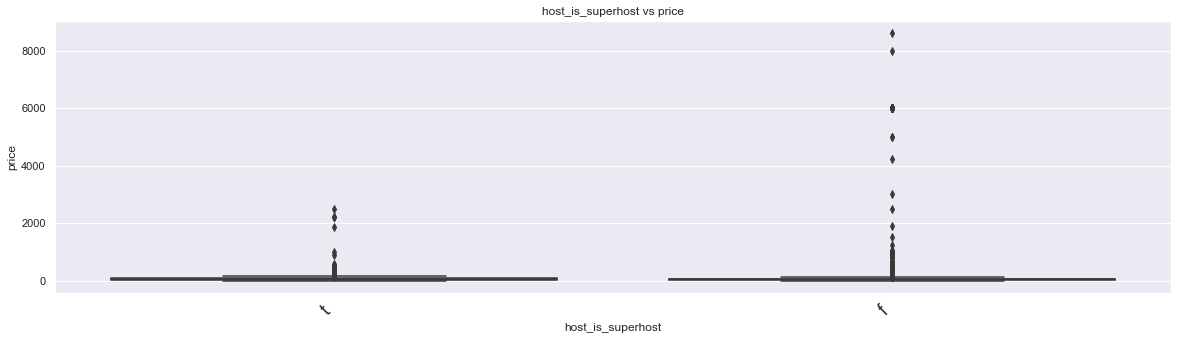

In [269]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="host_is_superhost", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('host_is_superhost vs price')
chart;

In [270]:
### Let us look at the distribution of price at different percentiles:
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 0.5)))
print("1% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 1)))
print("5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 5)))
print("10% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 10)))
print("90% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 90)))
print("95% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 95)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99.5)))

0.5% properties have a price lower than  13.00
1% properties have a price lower than  15.00
5% properties have a price lower than  20.00
10% properties have a price lower than  24.00
90% properties have a price lower than  100.00
95% properties have a price lower than  140.00
99% properties have a price lower than  270.00
99.5% properties have a price lower than  400.00


In [271]:
### We are interested in building a model to correctly predict the 
### listing price of a property which is greater than 1 and less than 270:

df = df[(df.price > 1) & (df.price < 270)]

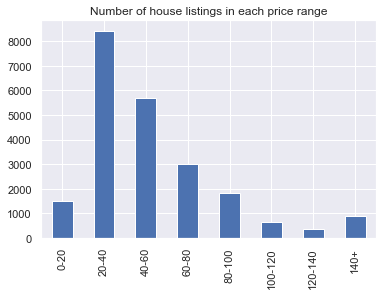

In [272]:
### Lets create a range variable to understand how many records we have in different slabs

price_range = pd.cut(df["price"], bins = [0, 20, 40, 60, 80, 100, 120, 140, df["price"].max()],
                    labels = ["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
df["price_range"] = price_range
df["price_range"].value_counts().sort_index().plot(kind = "bar")
plt.title("Number of house listings in each price range")
plt.show()

Using the derived variable above, we can create a multi class classification problem and that will help us predict the price ranges that the property would fall into. However, in this problem, we shall consider price as a continuous variable and consider this as a regression problem:

<AxesSubplot:xlabel='price', ylabel='Count'>

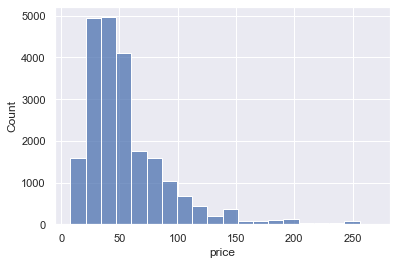

In [273]:
sns.histplot(df['price'], bins = 20)

<AxesSubplot:xlabel='price', ylabel='Count'>

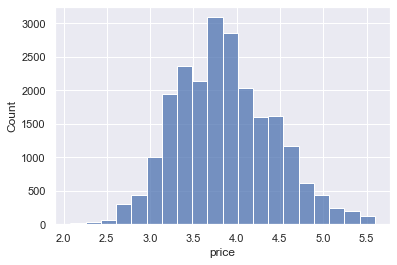

In [274]:
sns.histplot(np.log(df['price']), bins = 20)

Log transformation of the price variable is looking to be more symmetrical than the distribution of the variable without any transformation. So let us carry forward with this transformed variable:

In [275]:
df.drop(['price_range'], axis = 1, inplace = True)

In [276]:
### Looking at the variable cleaning fee
df.cleaning_fee.value_counts()

$0.00      1845
$20.00     1810
$10.00     1629
$30.00     1524
$15.00     1422
$50.00     1049
$25.00     1043
$40.00      855
$5.00       649
$35.00      550
$60.00      310
$45.00      286
$80.00      139
$8.00       138
$12.00      135
$70.00      108
$100.00     108
$19.00       86
$65.00       81
$18.00       77
$55.00       75
$29.00       73
$9.00        66
$36.00       66
$49.00       66
$4.00        66
$7.00        64
$75.00       63
$39.00       61
$150.00      46
$6.00        46
$14.00       37
$90.00       37
$16.00       35
$59.00       31
$38.00       28
$120.00      28
$85.00       27
$37.00       26
$13.00       26
$24.00       23
$17.00       21
$28.00       21
$48.00       20
$69.00       20
$32.00       19
$27.00       19
$22.00       19
$95.00       18
$26.00       17
$23.00       16
$33.00       13
$200.00      13
$34.00       10
$11.00       10
$62.00        9
$43.00        9
$57.00        8
$54.00        8
$400.00       8
$21.00        7
$42.00        6
$77.00  

In [277]:
df.cleaning_fee.fillna('$0.00', inplace = True)
df.cleaning_fee = df.cleaning_fee.str.replace('$','').str.replace(',','').astype(float).astype(int)
df.cleaning_fee.isna().sum()

<ipython-input-277-a3c2584c85c5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.cleaning_fee = df.cleaning_fee.str.replace('$','').str.replace(',','').astype(float).astype(int)


0

In [278]:
### Checking for correlation between price and cleaning fee:
np.corrcoef(df.cleaning_fee, df.price)

array([[1.        , 0.40280616],
       [0.40280616, 1.        ]])

Although the correlation between cleaning_fee and price is not high, if we know the price we can calculate the cleaning_fee.
Hence we will drop the variable cleaning _fee as it might turn out to be the most significant variable in predicting the price. The objective of this analysis is to find out the important variables in determining the price."

In [279]:
## To check if the demand is dependant on whether the host is a superhost:
## Checking superhost column for NaN:
df.host_is_superhost.isna().sum()

25

In [280]:
df['host_is_superhost'].value_counts(1)

f    0.867384
t    0.132616
Name: host_is_superhost, dtype: float64

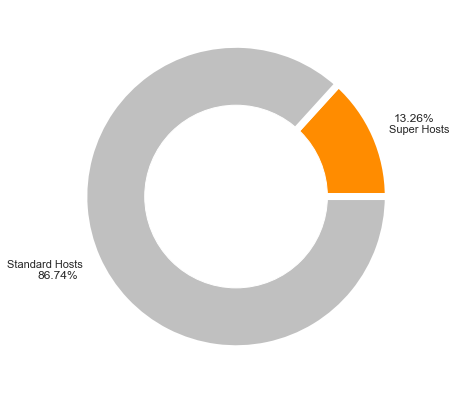

In [281]:
super_host = df.host_is_superhost.value_counts()['t']
no_superhost = df.host_is_superhost.value_counts()['f']
names = ['Super Hosts', 'Standard Hosts']
size = [super_host, no_superhost]

## Creating a pie chart
plt.pie(size, labels = names, colors = ['darkorange','silver'],
       autopct = '%.2f%%', pctdistance = 1.28, wedgeprops = {'linewidth':7, 'edgecolor':'white'})


### create circle for the center of the plot to make the pie look like a donut:
my_circle = plt.Circle((0,0),0.6, color = 'white')

### plot the donut chart:
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

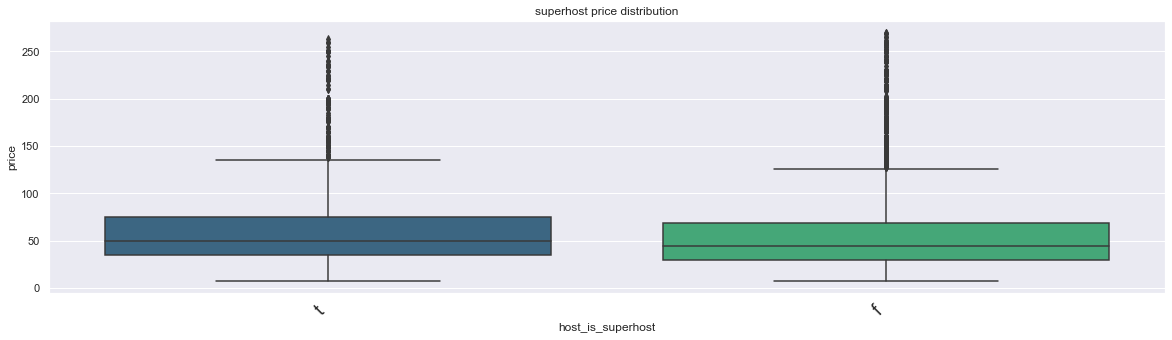

In [282]:
### Lets check if being a superhost has any price impact:

plt.figure(figsize = (20,5))

chart = sns.boxplot(x = "host_is_superhost", y = "price", data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('superhost price distribution')
chart;

Judging from the above plot, being a superhost has no visible impact on the price. We can always try out different hypothesis tests to confirm this.

#### Studying the latitude and logitude features:

In [283]:
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()
locations = list(zip(lat,lon))

### 52.5200° N, 13.4050° E is the latitude and longitude of Berlin

map1 = folium.Map(location = [52.5200, 13.4050], zoom_start = 12)
FastMarkerCluster(locations).add_to(map1)
map1

To better evaluate the location of each listing, we need to calculate the distance of each listing to one of the top 5 locations in Berlin. Here we define the top 5 locations in Berlin as: Berlin Main train station (hbf), Berlin Tegel Airport (txl), Brandenburg Tor (btor), Museum Island (museum), Reichstag (reichstag)

In [284]:
from math import sin, cos, sqrt, atan2, radians
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0 ##(approximate radius of the earth in KM)
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

In [285]:
### Top locations in Berlin

toploc = {"hbf": [52.525293, 13.369359],
         "txl": [52.558794, 13.288437],
         "btor": [52.516497, 13.377683],
         "museum":[52.517693, 13.402141],
         "reichstag":[52.518770, 13.376166]}
toploc = pd.DataFrame.from_dict(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude","longitude"]

# Construct distance columns:

dist = []
for col in toploc.columns:
    df["dist_"+col]= df.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis = 1)
    dist.append("dist_"+col)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22315 entries, 0 to 22551
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22290 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host

In [287]:
### This dictionary only contains the names of the newly created columns:

dist

['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']

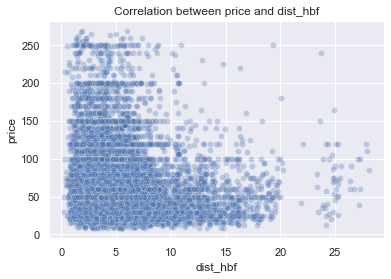

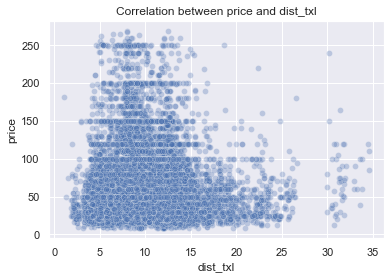

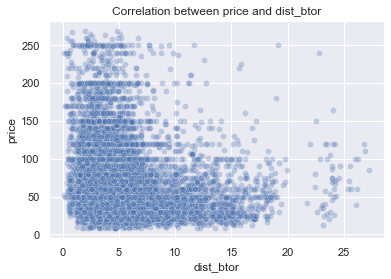

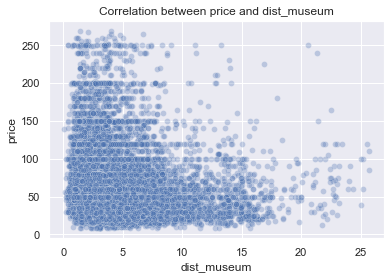

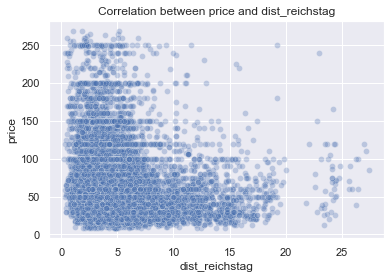

In [288]:
from scipy import stats
for distance in dist:
    sns.scatterplot(x = distance, y = 'price', data = df, alpha = 0.3)
    plt.title('Correlation between price and '+distance)
    plt.show()

In [289]:
##As the scatterplot is similar for all the distance variables, let us take an average of the distance and create a new variable
df['dist_average'] = df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag']].mean(axis = 1)

In [290]:
df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average']].head()

dist_hbf  dist_txl  dist_btor  dist_museum  dist_reichstag  dist_average
0  2.470531  8.177076   2.619164     1.873802        2.503054      3.528725
1  3.512827  7.935716   3.998364     3.431962        3.825405      4.540855
2  3.436703  9.127423   3.394579     2.189884        3.333330      4.296384
3  3.245779  7.828150   2.757640     4.159571        2.876309      4.173490
4  3.677298  8.740897   3.898852     2.964838        3.780919      4.612561

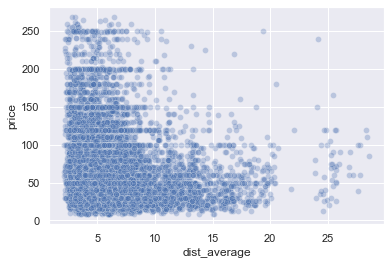

In [291]:
sns.scatterplot(x = 'dist_average', y = 'price', data = df, alpha = 0.3);

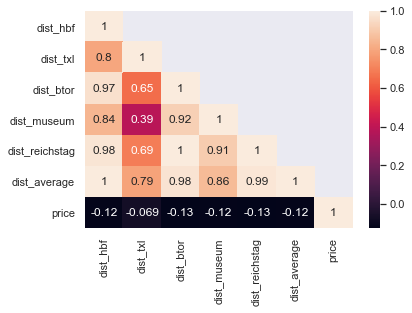

In [292]:
sns.heatmap(df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),
           annot = True, mask = np.triu(df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(), +1));

In [293]:
### Looking at a field that has textual values:

df['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [294]:
### Identifying the 10 most frequently occuring amenities in the dataset:

from collections import Counter
amenities = Counter()
df['amenities'].str.strip('{}')\
            .str.replace('"','')\
            .str.lstrip('\"')\
            .str.rstrip('\"')\
            .str.split(',')\
            .apply(amenities.update)

amenities.most_common(10)

[('Wifi', 21295),
 ('Kitchen', 21135),
 ('Heating', 20993),
 ('Essentials', 20116),
 ('Washer', 18330),
 ('Hair dryer', 14708),
 ('Laptop friendly workspace', 14296),
 ('Hangers', 13728),
 ('Iron', 11042),
 ('Shampoo', 10500)]

In [295]:
### feature engineering: Creating a few columns with some of the most frequently occuring amenities:

df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df['Family_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Hair_dryer'] = df['amenities'].str.contains('Hair dryer')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22315 entries, 0 to 22551
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22290 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host

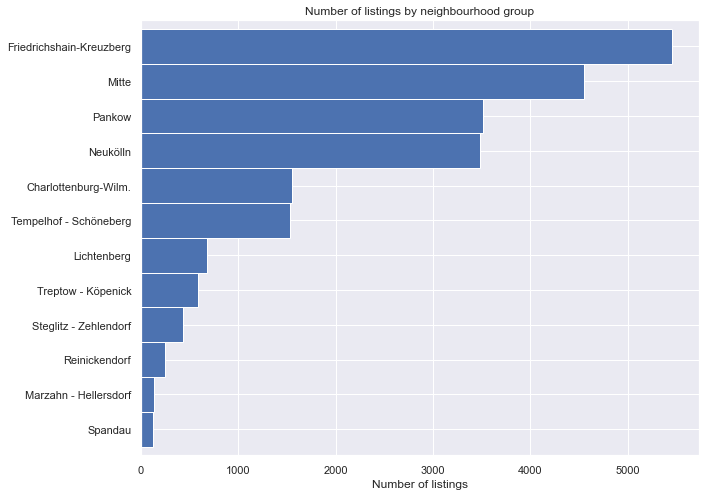

In [297]:
freq = df['neighbourhood_group_cleansed'].value_counts().sort_values(ascending = True)
freq.plot.barh(figsize = (10,8), width = 1)
plt.title('Number of listings by neighbourhood group')
plt.xlabel('Number of listings')
plt.show()

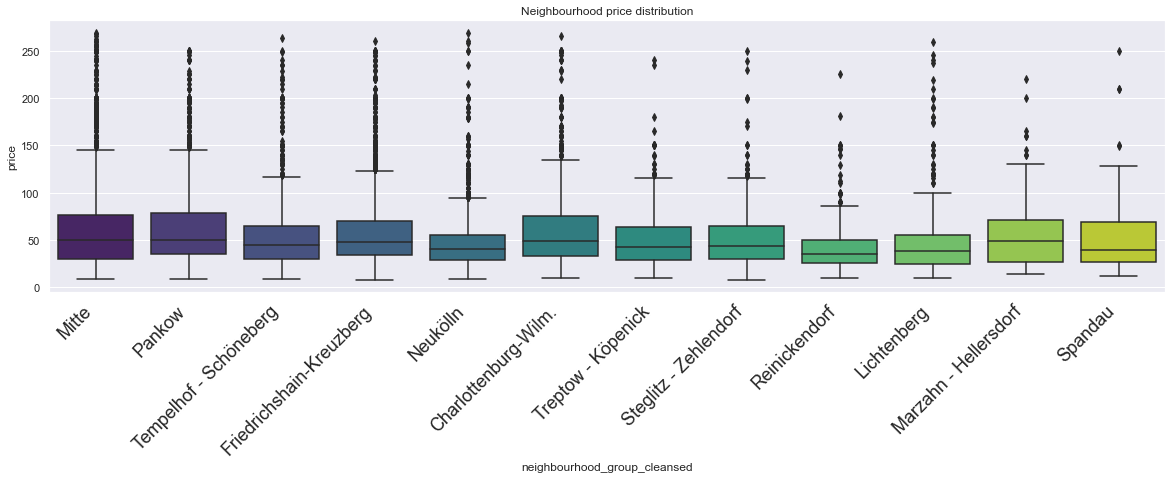

In [298]:
plt.figure(figsize = (20,5))
chart = sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('Neighbourhood price distribution')
chart;

Price does vary based on the neighbourhood group as expected. This conclusion can be drawn using the graphical plot. For further analysis it is advised to carry out statistical tests.
Let us analyse the impact on price using a combination of neighbourhood group along with other variables:

1.0    17087
2.0     2926
0.0     1471
3.0      666
4.0      120
5.0       18
6.0        5
8.0        2
7.0        1
9.0        1
Name: bedrooms, dtype: int64 



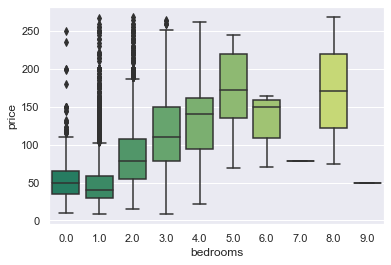

In [299]:
### Let us see the number of bedrooms of each property:
print(df['bedrooms'].value_counts(),'\n')

## To find out the distribution of bedrooms with price... ideally if the number of bedrooms is more the price increases
sns.boxplot(x = 'bedrooms', y = 'price', data = df, palette = 'summer');

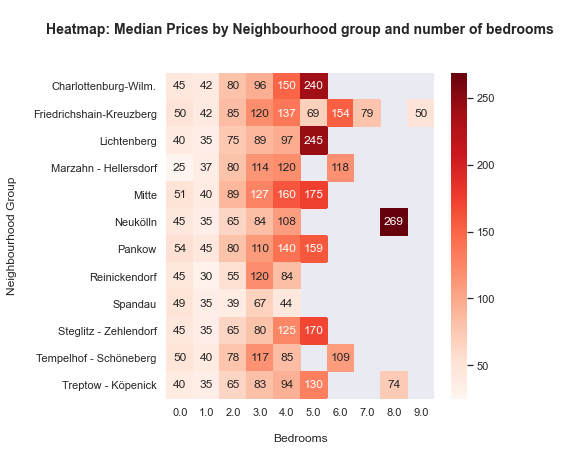

In [300]:
plt.figure(figsize = (6,6))
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(),
            cmap = 'Reds', annot = True, fmt = '0.0f')

plt.xlabel('\nBedrooms', fontsize = 12)
plt.ylabel('Neighbourhood Group\n', fontsize = 12)
plt.title('\nHeatmap: Median Prices by Neighbourhood group and number of bedrooms\n\n', fontsize = 14, fontweight = 'bold');

Price difference based on the neighbourhood group and bedrooms is clearly visible. For most of the neighbourhood groups, higher the count of the bedroom, higher is the median price.

In [301]:
df['cancellation_policy'].value_counts()

flexible                       9025
moderate                       7045
strict_14_with_grace_period    6188
super_strict_30                  48
super_strict_60                   9
Name: cancellation_policy, dtype: int64

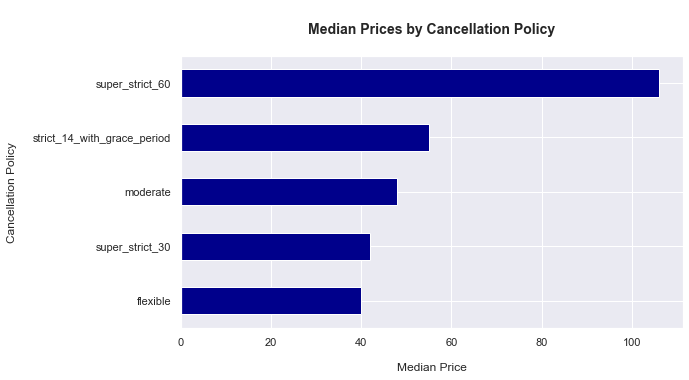

In [302]:
### Let us check the impact of cancellation policy on price:

### group by neighbourhood groups, take the median price and store new values in sub df
df_grouped = pd.DataFrame(df.groupby(['cancellation_policy'])['price'].agg(np.median))
df_grouped.reset_index(inplace = True)

# Plot this
df_grouped.sort_values(by = ['price'], ascending = True)\
            .plot(kind = 'barh', x = 'cancellation_policy', y = 'price',
                 figsize = (9,5), legend = False, color = 'darkblue')

plt.xlabel('\nMedian Price', fontsize = 12)
plt.ylabel('Cancellation Policy\n', fontsize = 12)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize = 14, fontweight = 'bold');

In [303]:
### If cancellation policy is flexible, price of the listing is lower:

In [304]:
### property type analysis:
df.property_type.unique()

array(['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Townhouse', 'Boutique hotel',
       'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other',
       'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin',
       'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel',
       'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn',
       'Pension (South Korea)', 'Casa particular (Cuba)'], dtype=object)

In [305]:
df['property_type'].value_counts()

Apartment                 20098
Condominium                 606
Loft                        439
House                       387
Serviced apartment          150
Hostel                      123
Townhouse                    95
Guest suite                  74
Bed and breakfast            64
Guesthouse                   56
Other                        44
Boutique hotel               36
Hotel                        31
Bungalow                     19
Boat                         14
Tiny house                   12
Camper/RV                    11
Villa                        10
Houseboat                     8
Pension (South Korea)         7
Cabin                         6
Aparthotel                    6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Cave                          1
In-law                        1
Island                        1
Barn                          1
Tipi    

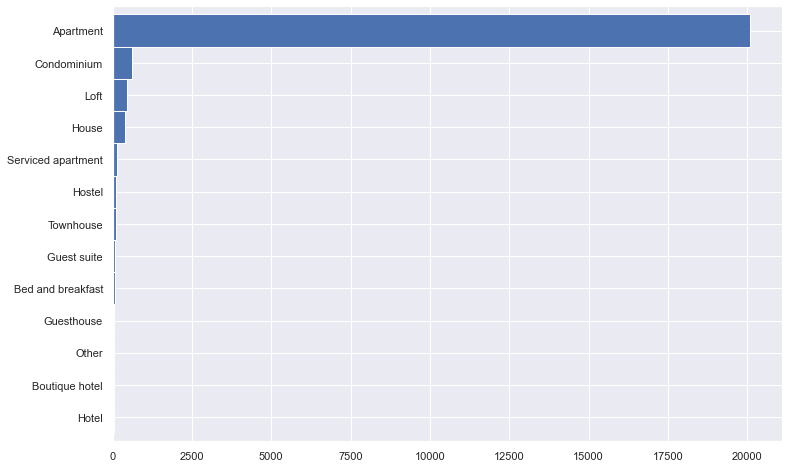

In [306]:
freq = df['property_type'].value_counts().sort_values(ascending = True)
freq = freq[freq>20] ## Eliminate types with less than 20 counts
freq.plot.barh(figsize = (12,8), width = 1)
plt.show()

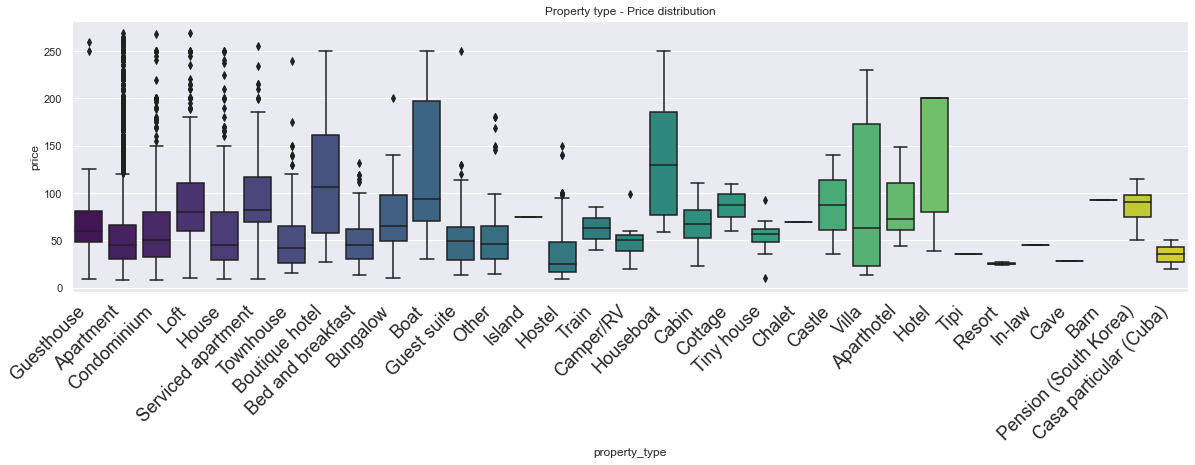

In [307]:
plt.figure(figsize = (20,5))

chart = sns.boxplot(x = 'property_type', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('Property type - Price distribution')
chart;

In [308]:
### As we can see in the previous frequency plot, most of the listings are of apartment type, so we will consider only 
### Apartment type from the listings dataset:

df = df[(df.property_type == 'Apartment')]

In [309]:
### Study of host_has_profile_pic

df.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [310]:
freq = df['host_has_profile_pic'].value_counts().sort_values(ascending = True)
freq

f       51
t    20024
Name: host_has_profile_pic, dtype: int64

In [311]:
### Since it is true in most of the cases, this might not be a hugely significant variable:


In [312]:
df.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [313]:
freq = df['host_identity_verified'].value_counts().sort_values(ascending = True)
freq

t     7886
f    12189
Name: host_identity_verified, dtype: int64

In [314]:
### Treat or drop the variable:

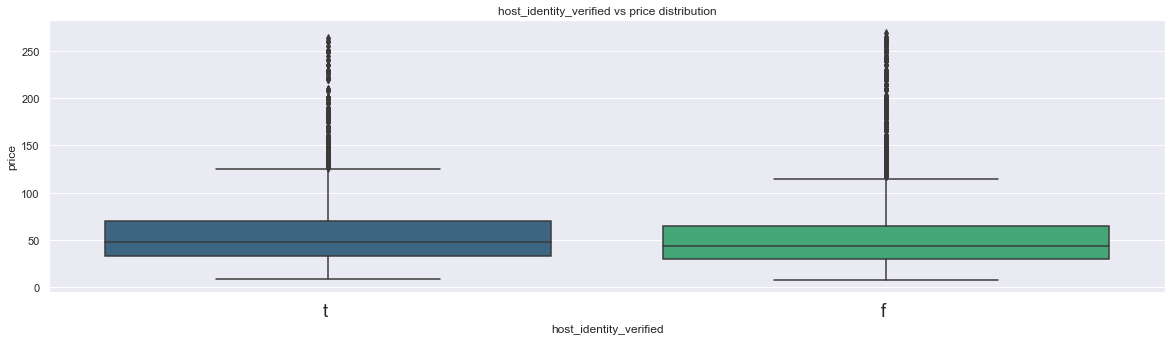

In [315]:
plt.figure(figsize = (20,5))

chart = sns.boxplot(x = 'host_identity_verified', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment = 'right', fontsize = 18)
plt.title('host_identity_verified vs price distribution')
chart;

In [316]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

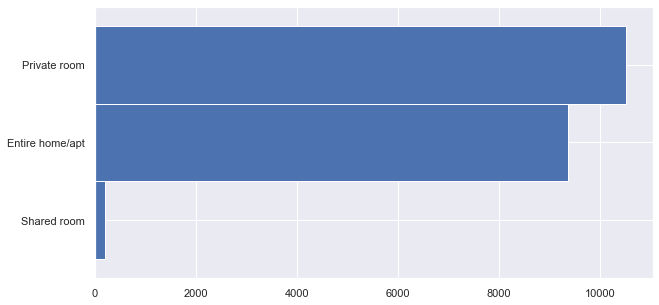

In [317]:
freq = df.room_type.value_counts().sort_values(ascending = True)
freq.plot.barh(figsize = (10,5), width = 1)
plt.show()

In [318]:
### Most of the listings have either private room or entire home/apt and shared room:

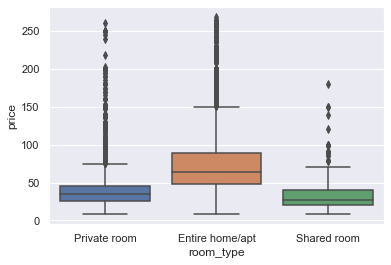

In [319]:
sns.boxplot(x = 'room_type', y = 'price', data = df);

In [320]:
### Price does vary based on room type:

In [321]:
df['accommodates'].value_counts().sort_index()

1      2495
2     11159
3      2249
4      2805
5       578
6       538
7        88
8       104
9        27
10       25
11       10
12       17
13        1
14        1
15        1
Name: accommodates, dtype: int64

In [322]:
### Looks like in Berlin, most of the time 2 travellers occupy a property.
### Let us now see that if accommodates is 2, what is the impact of neighbourhood group has on price..
### Does the average daily price for 2 people have any dependency on the neighbourhood group?

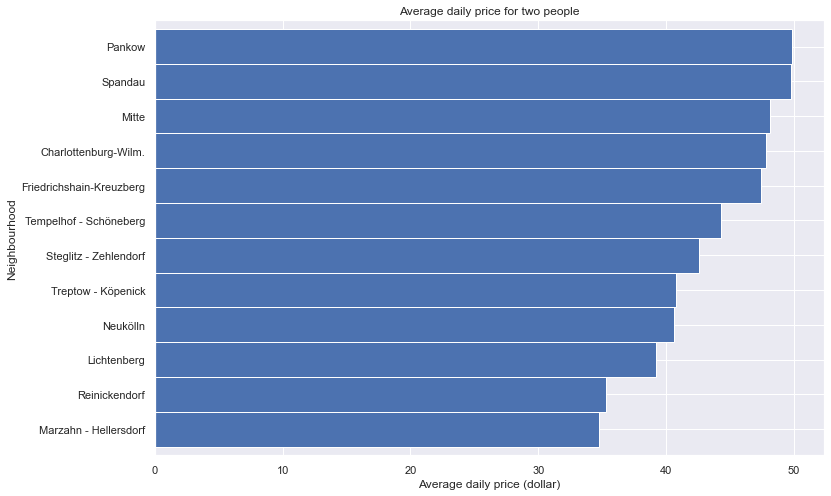

In [323]:
freq = df[df['accommodates'] == 2]
freq = freq.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending = True)
freq.plot.barh(figsize = (12,8), width = 1)
plt.title('Average daily price for two people')
plt.xlabel('Average daily price (dollar)')
plt.ylabel('Neighbourhood')
plt.show()

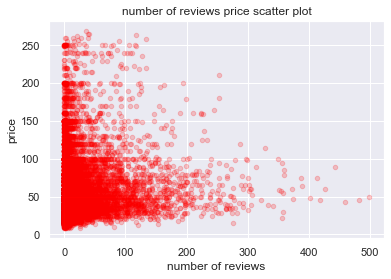

In [324]:
### Study number_of_reviews:

df.plot(kind = 'scatter', x = 'number_of_reviews', y = 'price', alpha = 0.2, color = 'red')
plt.xlabel('number of reviews')
plt.ylabel('price')
plt.title('number of reviews price scatter plot')
plt.show()

Some of the listings with less count of number of reviews have a higher price and vice versa. Some of the listings with high number of reviews have a low price. This presents a window of opportunity for sentiment analysis to help us analyze the sentiment.

In [325]:
### Let us check what kind of entries are there in the variable: Experiences offered

df['experiences_offered'].unique()

array(['none'], dtype=object)

We notice that the variable 'experiences_offered' has only kind of entry so we will exclude this variable from our anaylsis.

In [326]:
### Let us check the date column, we can use this column to filter and understand how the date of the hosts vary

df['host_since']

1        16-09-2008
2        19-10-2008
3        07-11-2008
4        16-05-2009
5        25-08-2009
6        18-11-2009
7        03-12-2009
8        20-12-2009
10       08-01-2010
12       20-12-2009
13       27-02-2010
14       02-03-2010
16       27-03-2010
17       27-03-2010
18       23-04-2010
19       18-11-2009
20       10-05-2010
21       22-02-2010
22       14-11-2009
23       05-04-2011
24       30-05-2010
25       12-06-2010
26       27-06-2010
27       02-07-2010
28       06-07-2010
29       21-06-2010
30       27-10-2010
31       11-07-2010
32       12-07-2010
34       24-07-2010
35       25-07-2010
36       27-10-2010
37       31-07-2010
38       01-08-2010
39       06-08-2010
40       08-08-2010
41       15-08-2010
43       31-08-2010
44       24-08-2010
45       22-04-2010
46       11-10-2010
47       13-10-2010
48       14-10-2010
49       17-10-2010
50       14-11-2009
51       27-10-2010
54       08-11-2010
55       01-08-2010
57       02-12-2010
58       04-12-2010


In [327]:
pd.DatetimeIndex(df['host_since'])

DatetimeIndex(['2008-09-16', '2008-10-19', '2008-07-11', '2009-05-16',
               '2009-08-25', '2009-11-18', '2009-03-12', '2009-12-20',
               '2010-08-01', '2009-12-20',
               ...
               '2015-01-21', '2014-05-09', '2018-06-11', '2017-02-17',
               '2013-10-20', '2018-02-01', '2014-09-15', '2016-02-08',
               '2016-04-17', '2018-09-03'],
              dtype='datetime64[ns]', name='host_since', length=20098, freq=None)

In [328]:
df['year'] = pd.DatetimeIndex(df['host_since']).year
df['year']

1        2008.0
2        2008.0
3        2008.0
4        2009.0
5        2009.0
6        2009.0
7        2009.0
8        2009.0
10       2010.0
12       2009.0
13       2010.0
14       2010.0
16       2010.0
17       2010.0
18       2010.0
19       2009.0
20       2010.0
21       2010.0
22       2009.0
23       2011.0
24       2010.0
25       2010.0
26       2010.0
27       2010.0
28       2010.0
29       2010.0
30       2010.0
31       2010.0
32       2010.0
34       2010.0
35       2010.0
36       2010.0
37       2010.0
38       2010.0
39       2010.0
40       2010.0
41       2010.0
43       2010.0
44       2010.0
45       2010.0
46       2010.0
47       2010.0
48       2010.0
49       2010.0
50       2009.0
51       2010.0
54       2010.0
55       2010.0
57       2010.0
58       2010.0
59       2010.0
60       2010.0
61       2011.0
62       2010.0
63       2010.0
64       2011.0
65       2011.0
66       2011.0
67       2010.0
68       2011.0
69       2011.0
70       2011.0
71      

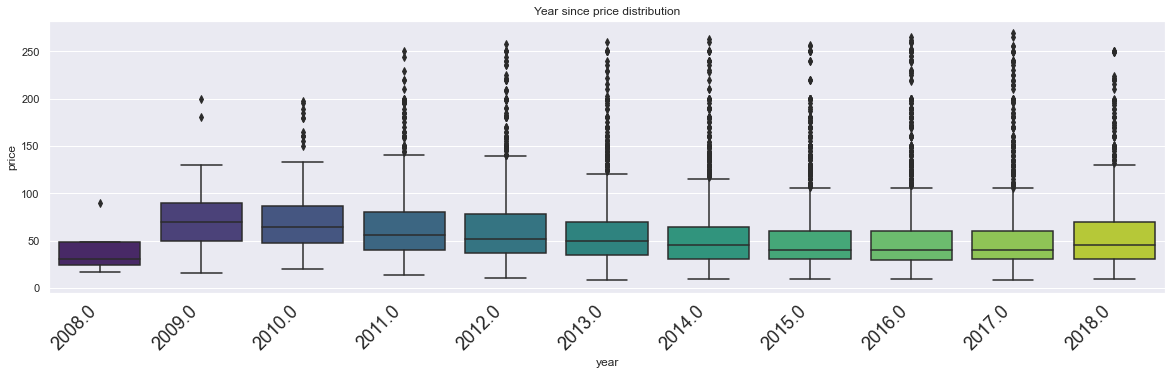

In [329]:
plt.figure(figsize = (20,5))

chart = sns.boxplot(x = 'year', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('Year since price distribution')
chart;

In [330]:
### The median price of the listings have come down gradually from the year of 2009 until 2017 and in 2018 it has increased.

In [331]:
### is_location_exact - Let us analyze this feature now:

freq = df['is_location_exact'].value_counts().sort_values(ascending = True)
freq

f     5237
t    14861
Name: is_location_exact, dtype: int64

In [332]:
### Most of the data points have a value as yes

In [333]:
### checking the correlation between the host_total_listing_count and host_listings_count
df[['host_listings_count','host_total_listings_count','calculated_host_listings_count']].corr()

host_listings_count  \
host_listings_count                        1.000000   
host_total_listings_count                  1.000000   
calculated_host_listings_count             0.171816   

                                host_total_listings_count  \
host_listings_count                              1.000000   
host_total_listings_count                        1.000000   
calculated_host_listings_count                   0.171816   

                                calculated_host_listings_count  
host_listings_count                                   0.171816  
host_total_listings_count                             0.171816  
calculated_host_listings_count                        1.000000

In [334]:
### We should only include either one of the perfectly correlated variables.

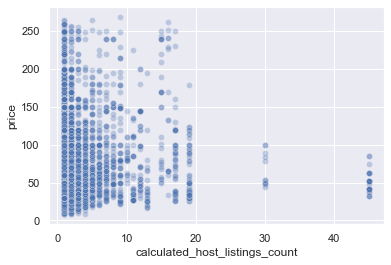

In [335]:
### Analyze calculated_calculated_host_listings_count
sns.scatterplot(x = 'calculated_host_listings_count', y = 'price', data = df, alpha = 0.3);

In [336]:
### No clear relationship with price, we shall also check how significant this variable is in our model:

In [337]:
### Analysis of bathrooms

df['bathrooms'].value_counts()

1.0    17980
1.5      973
2.0      942
0.5       88
2.5       39
0.0       22
3.0       13
4.0        5
8.0        2
7.5        2
7.0        1
3.5        1
Name: bathrooms, dtype: int64

In [338]:
df['bedrooms'].value_counts()

1.0    15549
2.0     2615
0.0     1270
3.0      556
4.0       83
5.0       11
6.0        3
Name: bedrooms, dtype: int64

In [339]:
df['beds'].value_counts()

1.0     13190
2.0      4715
3.0      1153
4.0       588
5.0       189
6.0       124
7.0        38
8.0        34
0.0        20
9.0        10
10.0        7
12.0        3
15.0        2
11.0        1
Name: beds, dtype: int64

In [340]:
df['bed_type'].value_counts()

Real Bed         19390
Pull-out Sofa      412
Futon              212
Couch               63
Airbed              21
Name: bed_type, dtype: int64

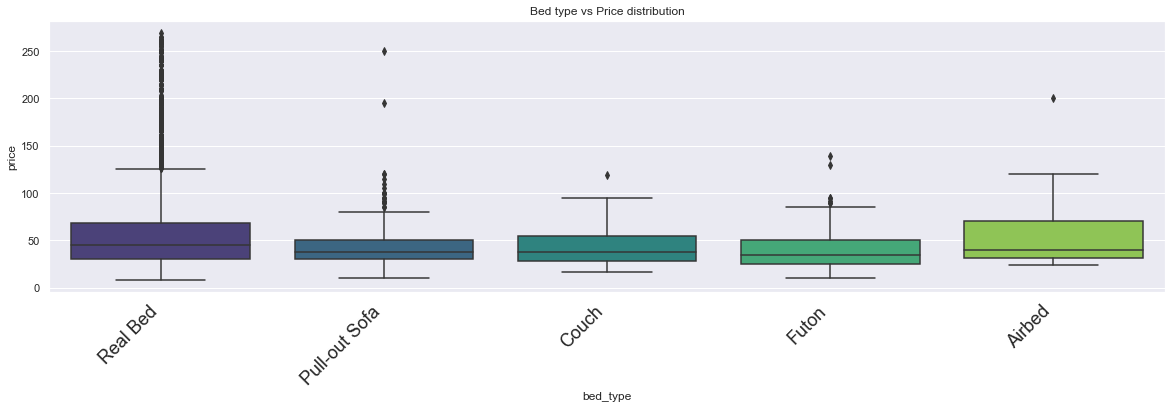

In [341]:
### Let us check how the price varies for the bed_type:

plt.figure(figsize = (20,5))
chart = sns.boxplot(x = 'bed_type', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('Bed type vs Price distribution')
chart;

In [342]:
### Analyze guests_included:

df['guests_included'].value_counts()

1     15754
2      3486
4       411
3       316
6        58
5        46
8         7
16        5
7         5
9         3
10        3
11        1
12        1
13        1
14        1
Name: guests_included, dtype: int64

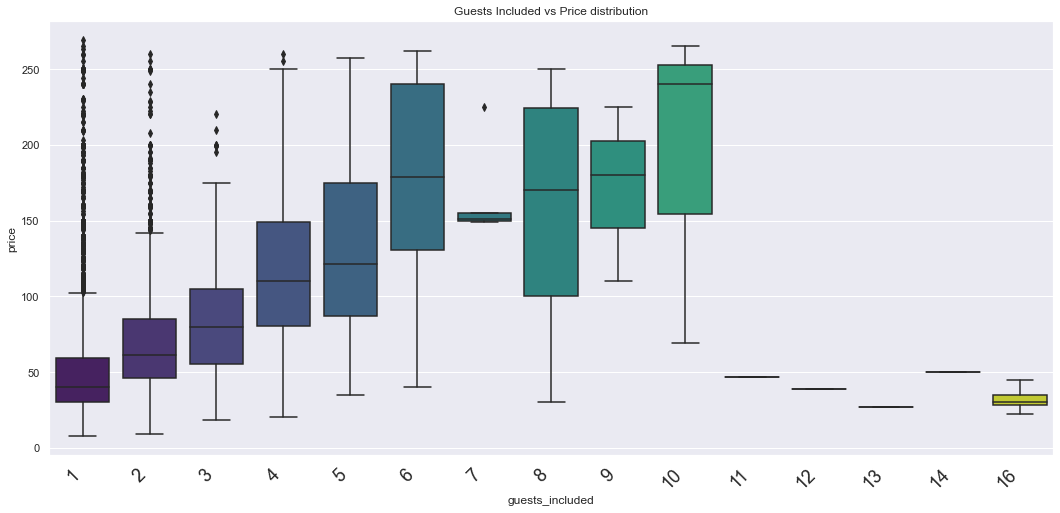

In [343]:
plt.figure(figsize = (18,8))

chart = sns.boxplot(x = 'guests_included', y = 'price', data = df, palette = 'viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 18)
plt.title('Guests Included vs Price distribution')
plt.show()

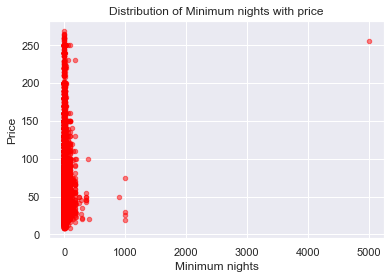

In [344]:
### Let us study the dependance of minimum nights and maximum nights with price

df.plot(kind = 'scatter', x = 'minimum_nights', y = 'price', alpha = 0.5, color = 'red')
plt.xlabel('Minimum nights')
plt.ylabel('Price')
plt.title('Distribution of Minimum nights with price')
plt.show()


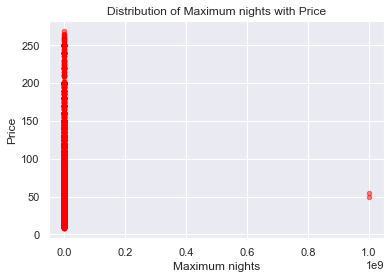

In [345]:
df.plot(kind = 'scatter', x = 'maximum_nights', y = 'price', alpha = 0.5, color = 'red')
plt.xlabel('Maximum nights')
plt.ylabel('Price')
plt.title('Distribution of Maximum nights with Price')
plt.show()

In [346]:
### Analyze has_availability

df['has_availability'].value_counts()

t    20098
Name: has_availability, dtype: int64

In [347]:
### There is no variation in this variable and ideally this should not be used in the model:

In [348]:
### availability_30 indicates for how many days rooms are available in the next 30 days:
### Based on the availability, price could vary and hence all features related to the availibility needs to be used in the model:

In [349]:
df['availability_30'].value_counts()

0     13444
6       446
1       413
4       386
5       346
29      332
2       318
3       313
7       279
8       257
30      257
9       230
14      196
12      196
11      195
23      191
10      187
27      187
28      186
15      173
13      164
16      156
20      156
17      156
18      155
19      146
25      144
22      140
21      135
24      115
26       99
Name: availability_30, dtype: int64

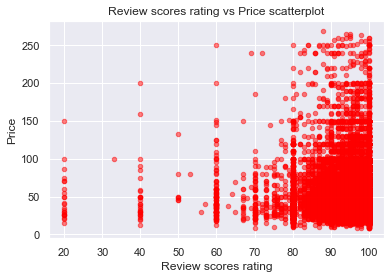

In [350]:
### Let us study the review_scores_rating with price:

df.plot(kind = 'scatter', x = 'review_scores_rating', y = 'price', alpha = 0.5, color = 'red')
plt.xlabel('Review scores rating')
plt.ylabel('Price')
plt.title('Review scores rating vs Price scatterplot')
plt.show()

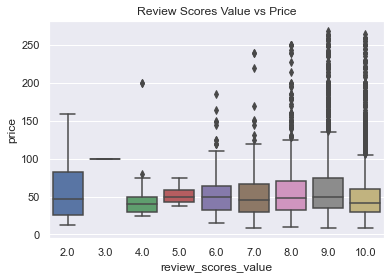

In [351]:
### Let us also study the review_scores_value with price:

sns.boxplot(x = 'review_scores_value', y = 'price', data = df)
plt.title('Review Scores Value vs Price')
plt.show()

In [352]:
### Analyze instant bookable

df['instant_bookable'].value_counts()

f    13988
t     6110
Name: instant_bookable, dtype: int64

In [353]:
### Analyze requires_license

df['requires_license'].value_counts()

t    20094
f        4
Name: requires_license, dtype: int64

In [354]:
### No variation in the requires license variable:

In [355]:
### Analyze is_business_travel_ready

df.is_business_travel_ready.value_counts()

f    20098
Name: is_business_travel_ready, dtype: int64

In [356]:
### Analyze require_guest_profile_picture
df.require_guest_profile_picture.value_counts()

f    19962
t      136
Name: require_guest_profile_picture, dtype: int64

In [357]:
df['require_guest_phone_verification'].value_counts()

f    19879
t      219
Name: require_guest_phone_verification, dtype: int64

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20098 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20098 non-null  int64  
 1   scrape_id                         20098 non-null  float64
 2   last_scraped                      20098 non-null  int64  
 3   experiences_offered               20098 non-null  object 
 4   host_id                           20098 non-null  int64  
 5   host_name                         20075 non-null  object 
 6   host_since                        20075 non-null  object 
 7   host_location                     19994 non-null  object 
 8   host_is_superhost                 20075 non-null  object 
 9   host_neighbourhood                15452 non-null  object 
 10  host_listings_count               20075 non-null  float64
 11  host_total_listings_count         20075 non-null  float64
 12  host

In [359]:
df['year'] = df['year'].astype(object)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20098 entries, 1 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20098 non-null  int64  
 1   scrape_id                         20098 non-null  float64
 2   last_scraped                      20098 non-null  int64  
 3   experiences_offered               20098 non-null  object 
 4   host_id                           20098 non-null  int64  
 5   host_name                         20075 non-null  object 
 6   host_since                        20075 non-null  object 
 7   host_location                     19994 non-null  object 
 8   host_is_superhost                 20075 non-null  object 
 9   host_neighbourhood                15452 non-null  object 
 10  host_listings_count               20075 non-null  float64
 11  host_total_listings_count         20075 non-null  float64
 12  host

In [361]:
df = pd.get_dummies(df, columns = ['host_is_superhost','host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy','Laptop_friendly_workspace','TV','Hot_water','Family_friendly','Hair_dryer','Smoking_allowed','year'], drop_first = True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20098 entries, 1 to 22551
Columns: 106 entries, id to year_2018.0
dtypes: float64(25), int32(1), int64(14), object(25), uint8(41)
memory usage: 11.3+ MB


In [363]:
df.rename(columns = {'neighbourhood_group_cleansed_Marzahn - Hellersdorf':'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Steglitz - Zehlendorf':'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Tempelhof - Schöneberg':'neighbourhood_group_cleansed_Tempelhof_Schöneberg', 'neighbourhood_group_cleansed_Treptow - Köpenick':'neighbourhood_group_cleansed_Treptow_Köpenick','bed_type_Pull-out Sofa':'bed_type_Pull_out_Sofa', 'bed_type_Real Bed':'bed_type_Real_Bed','room_type_Private room':'room_type_Private_room','room_type_Shared room':'room_type_Shared_room','Hot_water_True':'Hot_water_True', 'year_2009.0':'year_2009','year_2010.0':'year_2010','year_2011.0':'year_2011','year_2012.0':'year_2012','year_2013.0':'year_2013','year_2014.0':'year_2014','year_2015.0':'year_2015','year_2016.0':'year_2016','year_2017.0':'year_2017','year_2018.0':'year_2018'}, inplace=True)

In [364]:
df_new = df[['host_total_listings_count','accommodates','guests_included','availability_30','availability_60',
'availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
'review_scores_value','calculated_host_listings_count','dist_average','bathrooms','bedrooms',
'host_is_superhost_t','host_identity_verified_t','neighbourhood_group_cleansed_Lichtenberg',
'neighbourhood_group_cleansed_Mitte','neighbourhood_group_cleansed_Neukölln',
'neighbourhood_group_cleansed_Tempelhof_Schöneberg','neighbourhood_group_cleansed_Treptow_Köpenick',
'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Pankow',
'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Reinickendorf',
'neighbourhood_group_cleansed_Spandau','is_location_exact_t','room_type_Private_room','room_type_Shared_room',                               
'bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_Real_Bed','instant_bookable_t',
'cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period','cancellation_policy_super_strict_30',
'cancellation_policy_super_strict_60','Laptop_friendly_workspace_True','TV_True','Hot_water_True','Family_friendly_True',
'Smoking_allowed_True','year_2009','year_2010','year_2011','year_2012','year_2013','year_2014','year_2015','year_2016',
'year_2017','year_2018','price']]

In [365]:
df_new.isna().sum()

host_total_listings_count                              23
accommodates                                            0
guests_included                                         0
availability_30                                         0
availability_60                                         0
availability_90                                         0
availability_365                                        0
number_of_reviews                                       0
review_scores_rating                                 3847
review_scores_accuracy                               3869
review_scores_cleanliness                            3867
review_scores_checkin                                3884
review_scores_communication                          3870
review_scores_location                               3883
review_scores_value                                  3887
calculated_host_listings_count                          0
dist_average                                            0
bathrooms     

In [366]:
### We will drop host_neighbourhood as imputation of this type of object variable using mode will not be accurate from analysis perspective
### If we use drop na then we will loose lot of rows wherein we do have data points for other feature hence drop na without imputation
### and/or  deleting the columns is not recommended
### All features pertaining to review with missing values, imputation would be done using median

df_new['review_scores_value'].replace(np.nan,df_new['review_scores_value'].median(), inplace = True)
df_new['review_scores_checkin'].replace(np.nan, df_new['review_scores_checkin'].median(), inplace = True)
df_new['review_scores_location'].replace(np.nan, df_new['review_scores_location'].median(), inplace = True)
df_new['review_scores_communication'].replace(np.nan, df['review_scores_communication'].median(), inplace = True)
df_new['review_scores_accuracy'].replace(np.nan, df_new['review_scores_accuracy'].median(), inplace = True)
df_new['review_scores_cleanliness'].replace(np.nan, df_new['review_scores_cleanliness'].median(), inplace = True)
df_new['review_scores_rating'].replace(np.nan, df_new['review_scores_rating'].median(), inplace = True)

D:\Greatlearning\Ananconda_install\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [367]:
df_new.isna().sum()

host_total_listings_count                            23
accommodates                                          0
guests_included                                       0
availability_30                                       0
availability_60                                       0
availability_90                                       0
availability_365                                      0
number_of_reviews                                     0
review_scores_rating                                  0
review_scores_accuracy                                0
review_scores_cleanliness                             0
review_scores_checkin                                 0
review_scores_communication                           0
review_scores_location                                0
review_scores_value                                   0
calculated_host_listings_count                        0
dist_average                                          0
bathrooms                                       

In [368]:
# Let us drop these missing values:
df_new.dropna(axis = 0, inplace = True)

<ipython-input-368-86a9eccd9c20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(axis = 0, inplace = True)


In [369]:
df_new.isna().sum()

host_total_listings_count                            0
accommodates                                         0
guests_included                                      0
availability_30                                      0
availability_60                                      0
availability_90                                      0
availability_365                                     0
number_of_reviews                                    0
review_scores_rating                                 0
review_scores_accuracy                               0
review_scores_cleanliness                            0
review_scores_checkin                                0
review_scores_communication                          0
review_scores_location                               0
review_scores_value                                  0
calculated_host_listings_count                       0
dist_average                                         0
bathrooms                                            0
bedrooms  

In [370]:
### Splitting the data into training and test set into 70:30 ratio

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, test_size = 0.30, random_state = 1)

In [371]:
from IPython.display import display

In [372]:
display(train.head())
print(train.shape)

host_total_listings_count  accommodates  guests_included  \
13984                        1.0             2                1   
19097                        3.0             2                1   
9454                         1.0             1                1   
18767                        1.0             2                1   
2456                         1.0             2                1   

       availability_30  availability_60  availability_90  availability_365  \
13984                0                0                0                 0   
19097                0                0                0                 0   
9454                 0                0                0                 0   
18767                0                0                0                 0   
2456                 0                0                0                 0   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
13984                  2                  80.0                     9.0   
19097                  2                 100.0                    10.0   
9454                   1                 100.0                    10.0   
18767                  2                 100.0                    10.0   
2456                   6                  93.0                     9.0   

       review_scores_cleanliness  review_scores_checkin  \
13984                        6.0                    9.0   
19097                       10.0                   10.0   
9454                        10.0                   10.0   
18767                       10.0                   10.0   
2456                         9.0                   10.0   

       review_scores_communication  review_scores_location  \
13984                         10.0                     8.0   
19097                         10.0                    10.0   
9454                          10.0                    10.0   
18767                         10.0                    10.0   
2456                           9.0                     9.0   

       review_scores_value  calculated_host_listings_count  dist_average  \
13984                  8.0                               1      3.890794   
19097                 10.0                               1      3.213830   
9454                  10.0                               1      7.265014   
18767                 10.0                               1      7.155850   
2456                   9.0                               1      5.923596   

       bathrooms  bedrooms  host_is_superhost_t  host_identity_verified_t  \
13984        1.5       1.0                    0                         0   
19097        1.0       1.0                    0                         1   
9454         1.0       1.0                    0                         0   
18767        1.0       1.0                    0                         1   
2456         1.0       1.0                    0                         0   

       neighbourhood_group_cleansed_Lichtenberg  \
13984                                         0   
19097                                         0   
9454                                          0   
18767                                         0   
2456                                          0   

       neighbourhood_group_cleansed_Mitte  \
13984                                   1   
19097                                   1   
9454                                    0   
18767                                   0   
2456                                    0   

       neighbourhood_group_cleansed_Neukölln  \
13984                                      0   
19097                                      0   
9454                                       0   
18767                                      1   
2456                                       1   

       neighbourhood_group_cleansed_Tempelhof_Schöneberg  \
13984                                                  0   
19097                                                  

(14023, 59)


In [373]:
display(test.head())
print(test.shape)

host_total_listings_count  accommodates  guests_included  \
14914                        2.0             4                2   
16489                        1.0             1                1   
4326                         1.0             4                2   
975                          1.0             2                1   
12948                        1.0             2                1   

       availability_30  availability_60  availability_90  availability_365  \
14914               21               48               74               264   
16489                0                0                0                 0   
4326                 0                0                0                 0   
975                 19               49               59                59   
12948                9                9                9                 9   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
14914                 58                  95.0                    10.0   
16489                  5                  96.0                    10.0   
4326                   9                  89.0                     9.0   
975                   40                  96.0                    10.0   
12948                 67                  99.0                    10.0   

       review_scores_cleanliness  review_scores_checkin  \
14914                       10.0                   10.0   
16489                       10.0                   10.0   
4326                        10.0                    9.0   
975                         10.0                   10.0   
12948                       10.0                   10.0   

       review_scores_communication  review_scores_location  \
14914                         10.0                    10.0   
16489                         10.0                    10.0   
4326                          10.0                     9.0   
975                           10.0                     9.0   
12948                         10.0                    10.0   

       review_scores_value  calculated_host_listings_count  dist_average  \
14914                  9.0                               1      4.510624   
16489                 10.0                               1      3.321683   
4326                   8.0                               1      6.930379   
975                   10.0                               1      3.452970   
12948                 10.0                               1      3.615030   

       bathrooms  bedrooms  host_is_superhost_t  host_identity_verified_t  \
14914        1.0       1.0                    1                         0   
16489        2.0       1.0                    0                         0   
4326         1.0       1.0                    0                         1   
975          1.0       1.0                    0                         1   
12948        1.0       1.0                    1                         0   

       neighbourhood_group_cleansed_Lichtenberg  \
14914                                         0   
16489                                         0   
4326                                          0   
975                                           0   
12948                                         0   

       neighbourhood_group_cleansed_Mitte  \
14914                                   0   
16489                                   0   
4326                                    0   
975                                     1   
12948                                   0   

       neighbourhood_group_cleansed_Neukölln  \
14914                                      0   
16489                                      0   
4326                                       0   
975                                        0   
12948                                      0   

       neighbourhood_group_cleansed_Tempelhof_Schöneberg  \
14914                                                  0   
16489                                                  

(6011, 59)


In [374]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = 'price ~ host_total_listings_count+accommodates+guests_included+availability_30+availability_60+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+host_identity_verified_t+neighbourhood_group_cleansed_Lichtenberg++neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Treptow_Köpenick+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Marzahn_Hellersdorf+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+is_location_exact_t+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+cancellation_policy_super_strict_60+Laptop_friendly_workspace_True+TV_True+Hot_water_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018', data = train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:12:57   Log-Likelihood:                -64724.
No. Observations:               14023   AIC:                         1.296e+05
Df Residuals:                   13964   BIC:                         1.300e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [375]:
### Iteration 2: Steps to improve the model

In [376]:
### Checking VIF values:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula = 'y~x', data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ', vif)

In [377]:
vif_cal(input_data = train.drop('price', axis = 1))

host_total_listings_count VIF =  1.04
accommodates VIF =  2.3
guests_included VIF =  1.37
availability_30 VIF =  8.97
availability_60 VIF =  24.57
availability_90 VIF =  14.01
availability_365 VIF =  2.24
number_of_reviews VIF =  1.4
review_scores_rating VIF =  3.01
review_scores_accuracy VIF =  2.14
review_scores_cleanliness VIF =  1.99
review_scores_checkin VIF =  1.92
review_scores_communication VIF =  1.97
review_scores_location VIF =  1.44
review_scores_value VIF =  2.44
calculated_host_listings_count VIF =  2.67
dist_average VIF =  3.0
bathrooms VIF =  1.07
bedrooms VIF =  1.68
host_is_superhost_t VIF =  1.25
host_identity_verified_t VIF =  1.2
neighbourhood_group_cleansed_Lichtenberg VIF =  1.24
neighbourhood_group_cleansed_Mitte VIF =  1.81
neighbourhood_group_cleansed_Neukölln VIF =  1.52
neighbourhood_group_cleansed_Tempelhof_Schöneberg VIF =  1.15
neighbourhood_group_cleansed_Treptow_Köpenick VIF =  1.5
neighbourhood_group_cleansed_Steglitz_Zehlendorf VIF =  1.25
neighbourho

In [378]:
vif_cal(input_data = train.drop(['price','availability_60'], axis = 1))

host_total_listings_count VIF =  1.04
accommodates VIF =  2.3
guests_included VIF =  1.37
availability_30 VIF =  3.86
availability_90 VIF =  5.4
availability_365 VIF =  2.2
number_of_reviews VIF =  1.4
review_scores_rating VIF =  3.01
review_scores_accuracy VIF =  2.14
review_scores_cleanliness VIF =  1.99
review_scores_checkin VIF =  1.92
review_scores_communication VIF =  1.97
review_scores_location VIF =  1.44
review_scores_value VIF =  2.44
calculated_host_listings_count VIF =  2.67
dist_average VIF =  3.0
bathrooms VIF =  1.07
bedrooms VIF =  1.68
host_is_superhost_t VIF =  1.25
host_identity_verified_t VIF =  1.2
neighbourhood_group_cleansed_Lichtenberg VIF =  1.24
neighbourhood_group_cleansed_Mitte VIF =  1.81
neighbourhood_group_cleansed_Neukölln VIF =  1.52
neighbourhood_group_cleansed_Tempelhof_Schöneberg VIF =  1.15
neighbourhood_group_cleansed_Treptow_Köpenick VIF =  1.5
neighbourhood_group_cleansed_Steglitz_Zehlendorf VIF =  1.25
neighbourhood_group_cleansed_Pankow VIF =  

In [380]:
lm2 = smf.ols(formula = 'price ~ accommodates+guests_included+availability_30+availability_90+availability_365+number_of_reviews+review_scores_rating+review_scores_cleanliness+review_scores_communication+review_scores_location+review_scores_value+calculated_host_listings_count+dist_average+bathrooms+bedrooms+host_is_superhost_t+neighbourhood_group_cleansed_Mitte+neighbourhood_group_cleansed_Neukölln+neighbourhood_group_cleansed_Tempelhof_Schöneberg+neighbourhood_group_cleansed_Steglitz_Zehlendorf+neighbourhood_group_cleansed_Pankow+neighbourhood_group_cleansed_Reinickendorf+neighbourhood_group_cleansed_Spandau+room_type_Private_room+room_type_Shared_room+bed_type_Couch+bed_type_Futon+bed_type_Pull_out_Sofa+bed_type_Real_Bed+instant_bookable_t+cancellation_policy_moderate+cancellation_policy_strict_14_with_grace_period+cancellation_policy_super_strict_30+Laptop_friendly_workspace_True+TV_True+Family_friendly_True+Smoking_allowed_True+year_2009+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015+year_2016+year_2017+year_2018',data = train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     308.4
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:50:27   Log-Likelihood:                -64726.
No. Observations:               14023   AIC:                         1.295e+05
Df Residuals:                   13975   BIC:                         1.299e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [381]:
### Prediction on training and test set:

y_pred_1_train = lm1.fittedvalues
y_pred_2_train = lm2.fittedvalues

y_pred_1_test = lm1.predict(test)
y_pred_2_test = lm2.predict(test)

In [383]:
### RMSE calculation on training and test set:
from sklearn.metrics import mean_squared_error

print('RMSE on Training set for Model 1:', mean_squared_error(y_true = train['price'], y_pred = y_pred_1_train, squared = False))
print('RMSE on training set for Model 2:', mean_squared_error(y_true = train['price'], y_pred = y_pred_2_train, squared = False))

RMSE on Training set for Model 1: 24.45052382928614
RMSE on training set for Model 2: 24.453691525935234


In [384]:
print('RMSE on Test set for Model 1:', mean_squared_error(y_true = test['price'], y_pred = y_pred_1_test, squared = False))
print('RMSE on Test set for Model 2:', mean_squared_error(y_true = test['price'], y_pred = y_pred_2_test, squared = False))

RMSE on Test set for Model 1: 23.83773244827622
RMSE on Test set for Model 2: 23.839379491468186


### END